In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import os
PATH = os.getcwd()


In [8]:
sanford_health_data = pd.read_csv('https://raw.githubusercontent.com/sethvfriesz/Capstone/main/Sanford_Data_Collaborative_Teaching_DataSet.csv')



In [10]:
sanford_health_data.head(5)

,ID,Sex,Age,Status,Hypertension,VascularDisease,Payor,Diabetes,A1C,BMI,ScheduledClinicVisits,MissedClinicVisits,DiastolicBP,SystolicBP,SmokingStatus
0,2,Male,82,Alive,0,0,Medicare,0,NaN,25.53,4.0,0.0,72,139,4
1,8,Female,50,Alive,0,0,Private Ins/Other,0,NaN,31.34,3.0,0.0,91,150,5
2,9,Female,60,Alive,1,0,Private Ins/Other,1,6.4,30.85,8.0,0.0,78,122,5
3,11,Male,59,Alive,1,0,Private Ins/Other,1,8.0,32.36,5.0,0.0,79,116,4
4,12,Male,65,Alive,1,0,Private Ins/Other,0,NaN,34.52,7.0,1.0,82,117,4


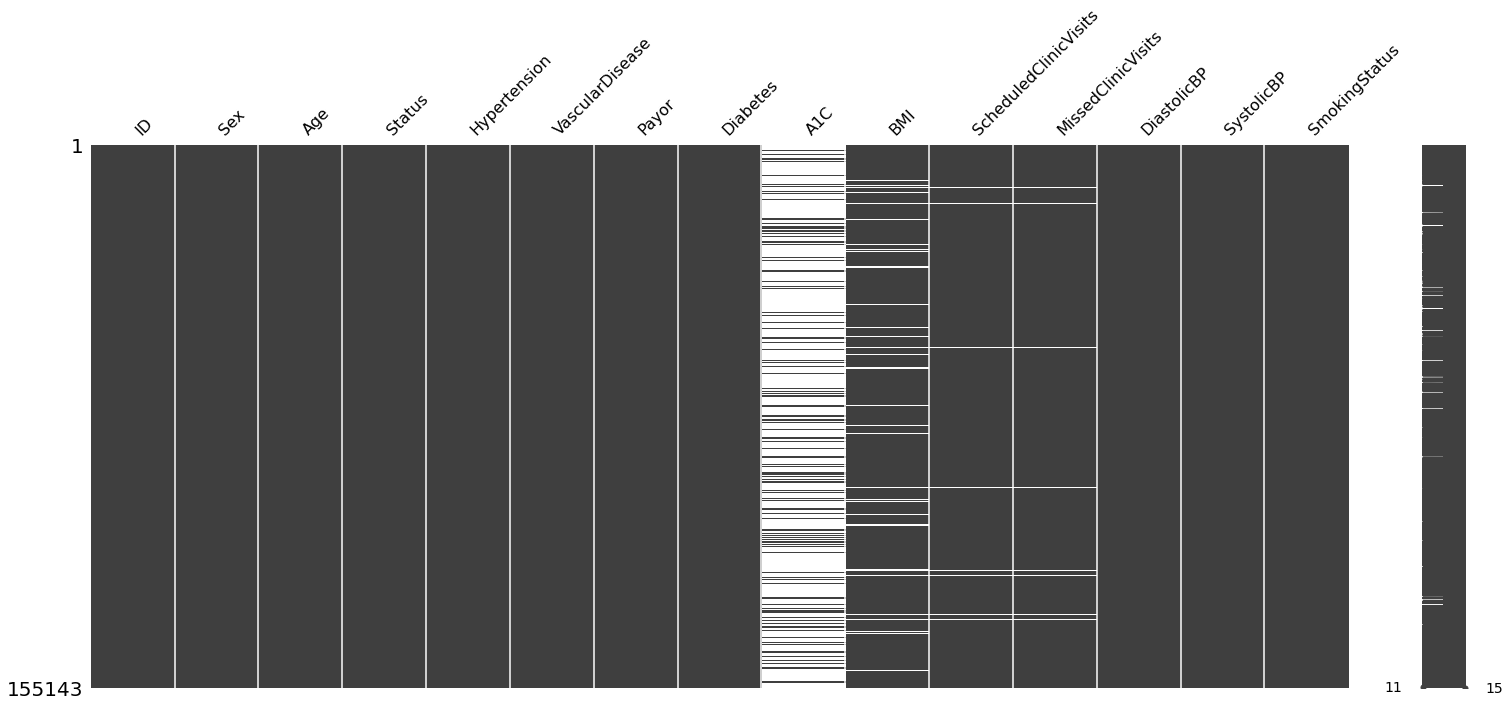

In [11]:
missingno.matrix(sanford_health_data)
plt.show()
# AIC is extremely incomplete; might want to see how much of an effect it plays with diabetes/hypertension/VascularDisease

In [12]:
na_percentages = (sanford_health_data.isna().sum()/len(sanford_health_data.index))
print('Percentage of A1C as NA')
print(na_percentages['A1C']*100)
print('How many values are not NA in dataframe')
na_values = len(sanford_health_data.index)*na_percentages['A1C']
print(len(sanford_health_data.index) - na_values)

Percentage of A1C as NA
77.58906299349633
How many values are not NA in dataframe
34769.0


## A1C_health_data is a subset of health_data where the 'A1C' column is not NaN

In [13]:
A1C_sanford_health_data = sanford_health_data.loc[sanford_health_data["A1C"].isna() == False,]

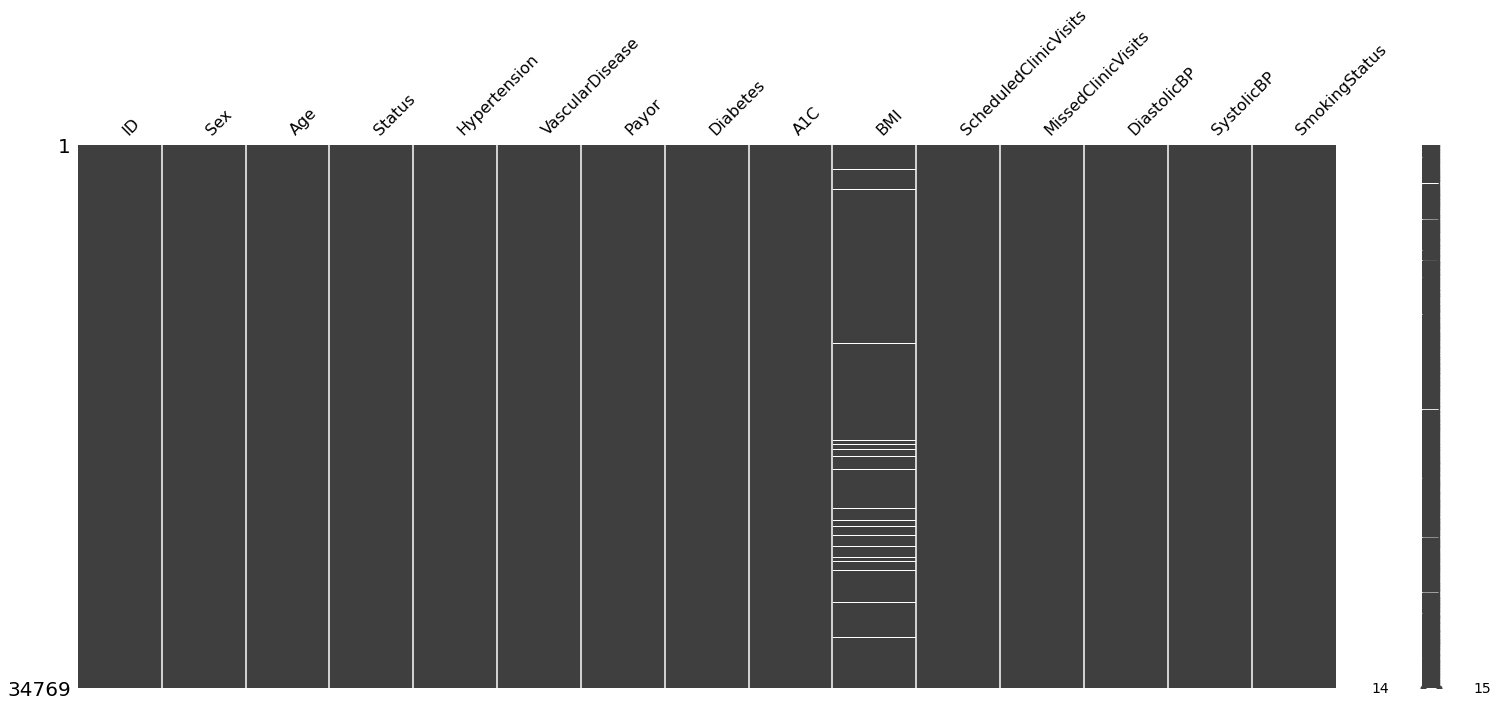

Percentage of BMI as NA
4.055336650464494
How many BMI values are not NA in dataframe
33359.0


In [14]:
missingno.matrix(A1C_sanford_health_data)
plt.show()
A1C_na_percentages = (A1C_sanford_health_data.isna().sum()/len(A1C_sanford_health_data.index))
print('Percentage of BMI as NA')
print(A1C_na_percentages['BMI']*100)
print('How many BMI values are not NA in dataframe')
A1C_na_values = len(A1C_sanford_health_data.index)*A1C_na_percentages['BMI']
print(len(A1C_sanford_health_data.index) - A1C_na_values)

All Data


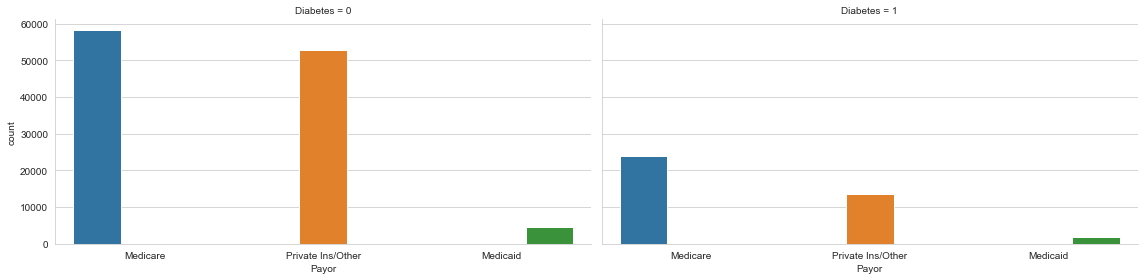

Non-NaN A1C data only


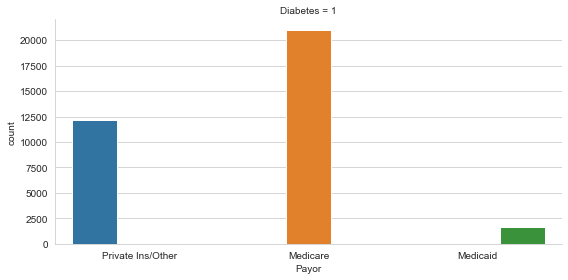

In [28]:
def can_I_get_a_countplot(column, dataset, group, title):
    sns.set_style('whitegrid')
    print(title)
    g = sns.catplot(x=column, hue=column, col=group,
                data=dataset, kind="count",
                height=4, aspect=2)
    plt.show()
can_I_get_a_countplot('Payor',sanford_health_data, 'Diabetes', 'All Data')
can_I_get_a_countplot('Payor', A1C_sanford_health_data, 'Diabetes', 'Non-NaN A1C data only')

In [ ]:
can_I_get_a_countplot()

There is no A1C data if you are not diabetic, so how should I go about handling A1C? I can't get rid of them because

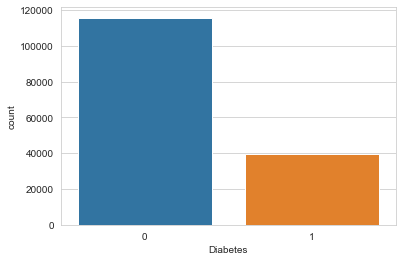

In [18]:
sanford_health_data['Payor'].unique()
sns.set_style('whitegrid')
ax = sns.countplot(x="Diabetes", data=sanford_health_data)

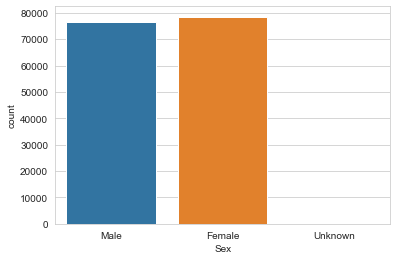

In [16]:
sns.set_style('whitegrid')
ax = sns.countplot(x="Sex", data=sanford_health_data)

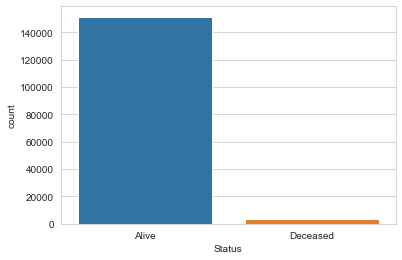

In [17]:
sns.set_style('whitegrid')
ax = sns.countplot(x="Status", data=sanford_health_data)

In [32]:
diabetic_df = sanford_health_data.loc[sanford_health_data['Diabetes'] == 1,]
diabetic_df
non_diabetic_df = sanford_health_data.loc[sanford_health_data['Diabetes'] == 0,]
non_diabetic_df.head(50)

,ID,Sex,Age,Status,Hypertension,VascularDisease,Payor,Diabetes,A1C,BMI,ScheduledClinicVisits,MissedClinicVisits,DiastolicBP,SystolicBP,SmokingStatus
0,2,Male,82,Alive,0,0,Medicare,0,NaN,25.53,4.0,0.0,72,139,4
1,8,Female,50,Alive,0,0,Private Ins/Other,0,NaN,31.34,3.0,0.0,91,150,5
4,12,Male,65,Alive,1,0,Private Ins/Other,0,NaN,34.52,7.0,1.0,82,117,4
6,20,Female,73,Alive,1,0,Medicare,0,NaN,35.71,1.0,0.0,64,131,5
7,21,Female,59,Alive,1,0,Private Ins/Other,0,NaN,34.79,7.0,0.0,82,145,5
8,27,Male,39,Alive,1,0,Private Ins/Other,0,NaN,61.71,4.0,0.0,86,141,5
9,39,Male,38,Alive,0,0,Private Ins/Other,0,NaN,46.46,4.0,1.0,73,134,5
10,43,Female,90+,Alive,0,0,Medicare,0,NaN,23.95,5.0,0.0,69,128,5
13,58,Female,57,Alive,0,0,Private Ins/Other,0,NaN,37.40,2.0,0.0,82,139,4
14,59,Male,75,Alive,1,0,Medicare,0,NaN,28.38,3.0,0.0,84,126,4
